<a href="https://colab.research.google.com/github/Graur/mipt/blob/master/HW3_Graur_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ДЗ № 3: Продвинутая визуализация данных (Граур Андрей)




In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apples = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/apple_quality.csv')
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### Задача 1. Сравнение качества работы kNN при разных параметрах k
На лекциях и семинарах мы разбирали возможности для применения стандартных библиотек при работе с алгоритмом kNN. Мы также обращали внимание, что существует большое количество кастомных библиотек для создания более тонкой и кастомной визуализации. Одна из них — библиотека mlxtend.plotting.

Эта библиотека позволяет создавать удобные визуализации работы алгоритмов машинного обучения. В ней есть функция plot_decision_regions, которая позволяет создавать визуализации для алгоритмов классификации.



#### Задача 1.1 (2 балла)
Напишите функцию, которая будет:

1) Отбирать все числовые признаки в датасете.


2) Перебирать все сочетания по два признака (без повторений) и запускать для каждой пары признаков алгоритм kNN (с k = 10). Для каждой итерации необходимо считать accuracy. Зависимая переменная  указывается отдельно при подаче в функцию.


3) Возвращает названия двух признаков, которые дали наибольший accuracy score. Если accuracy score совпадают для двух или нескольких пар, верните первую найденную вами пару.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations

def knn_two_features(df, y):
    df = df.dropna()
    numeric_features = df.select_dtypes(include=['float64', 'int64'])
    feature_combinations = list(combinations(numeric_features.columns, 2))
    best_accuracy = 0
    best_features = None

    for feature1, feature2 in feature_combinations:
        X_current = numeric_features[[feature1, feature2]]
        X_train, X_test, y_train, y_test = train_test_split(X_current, df[y], test_size=0.2, random_state=42)
        knn = KNeighborsClassifier(n_neighbors=10)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = (feature1, feature2)
    return best_features

best_features = knn_two_features(apples, 'Quality')
print("Признаки с наибольшим accuracy score:", best_features)


Признаки с наибольшим accuracy score: ('Juiciness', 'Ripeness')


### Задача 1.2 (2 балла)
Мы получили два признака, которые вместе дают наибольший accuracy score. Теперь покрутите их, одновременно изменяя параметр k. С помощью plot_decision_regions библиотеки mlxtend.plotting постройте поле 3х3 из визуализаций результатов работы алгоритма kNN с разными параметрами k. Параметры k можно взять следующие: 1, 2, 5, 10, 15, 20, 30, 40, 50.

<ipython-input-17-cf9cf0dd4f01>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target] = le.fit_transform(df[target])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does no

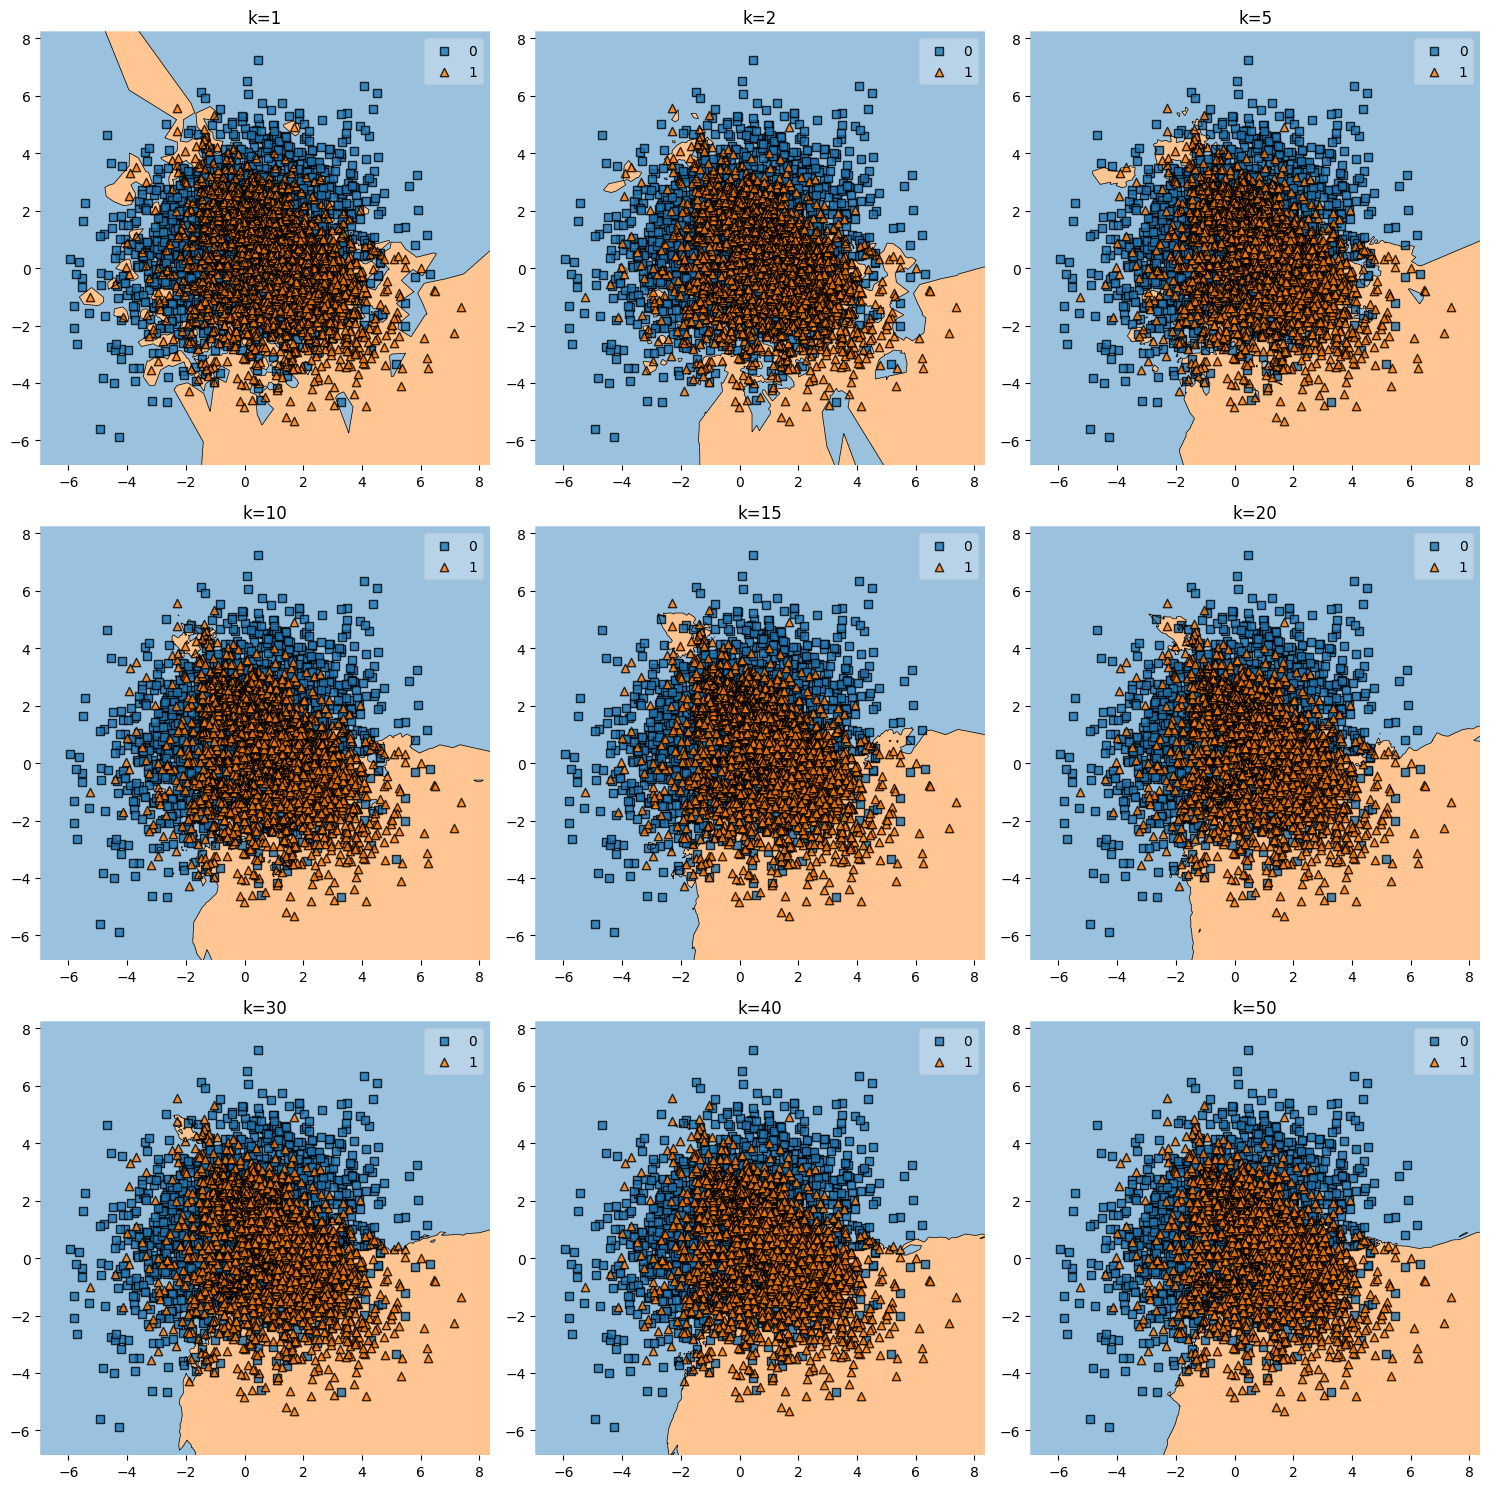

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

def plot_knn_decision_regions(df, features, target, ks):
    df = df.dropna()
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

    for i, k in enumerate(ks):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(df[features], df[target])
        plot_decision_regions(X=df[features].values, y=df[target].values, clf=knn, ax=axes[i])
        axes[i].set_title(f'k={k}')

    plt.tight_layout()
    plt.show()

ks = [1, 2, 5, 10, 15, 20, 30, 40, 50]

plot_knn_decision_regions(apples, ['Juiciness', 'Ripeness'], 'Quality', ks)


### Задача 1.3 (1 балл)
Функция plot_decision_regions удобна тем, что ее можно использовать для визуализации разных алгоритмов классификации.

Выберите два параметра, которые кажутся вам наиболее важными при оценке качества яблок. Используйте их, чтобы построить алгоритм решающего дерева.
Также постройте решающее дерево для признаков, которые были отобраны в пункте 1.1.
Создайте поле 1х2 и визуализируйте полученные результаты. Каждый график озаглавьте.

<ipython-input-37-65761ea7519e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target] = le.fit_transform(df[target])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


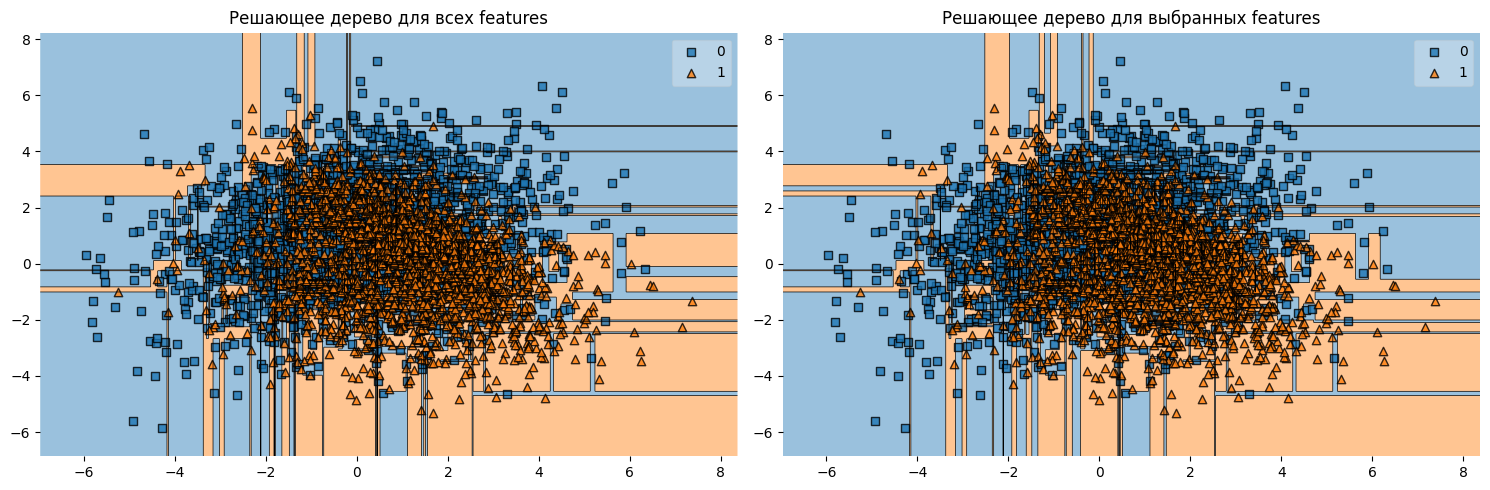

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

def plot_decision_tree(df, features, target):
    df = df.dropna()
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])
    dt = DecisionTreeClassifier()
    dt.fit(df[features], df[target])
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    plot_decision_regions(X=df[features].values, y=df[target].values, clf=dt, ax=axes[0])
    axes[0].set_title('Решающее дерево для всех features')

    dt_selected = DecisionTreeClassifier()
    dt_selected.fit(df[['Juiciness', 'Ripeness']], df[target])

    plot_decision_regions(X=df[['Juiciness', 'Ripeness']].values, y=df[target].values, clf=dt_selected, ax=axes[1])
    axes[1].set_title('Решающее дерево для выбранных features')

    plt.tight_layout()
    plt.show()

important_features = ['Juiciness', 'Ripeness']
plot_decision_tree(apples, important_features, 'Quality')


## Задача 2. Визуализация алгоритмов решающего дерева
### Задача 2.1 (1 балл)
Аналогично пункту 1.1, создайте две функции для алгоритмов решающего дерева:

Функцию, которая возвращает два параметра, дающие наибольший accuracy score при применении алгоритма решающего дерева.
Такую же функцию, но которая возвращает три параметра (то есть перебирает все значения не по парам признаков, а по тройкам).

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations

def decision_tree_two_features(df, y):
    df = df.dropna()
    numeric_features = df.select_dtypes(include=['float64', 'int64'])
    feature_combinations = list(combinations(numeric_features.columns, 2))
    best_accuracy = 0
    best_features = None

    for feature1, feature2 in feature_combinations:
        X_current = numeric_features[[feature1, feature2]]
        X_train, X_test, y_train, y_test = train_test_split(X_current, df[y], test_size=0.2, random_state=42)
        dt = DecisionTreeClassifier()
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = (feature1, feature2)

    return best_features

def decision_tree_three_features(df, y):
    df = df.dropna()
    numeric_features = df.select_dtypes(include=['float64', 'int64'])
    feature_combinations = list(combinations(numeric_features.columns, 3))
    best_accuracy = 0
    best_features = None

    for feature1, feature2, feature3 in feature_combinations:
        X_current = numeric_features[[feature1, feature2, feature3]]
        X_train, X_test, y_train, y_test = train_test_split(X_current, df[y], test_size=0.2, random_state=42)
        dt = DecisionTreeClassifier()
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = (feature1, feature2, feature3)

    return best_features

best_features_two = decision_tree_two_features(apples, 'Quality')
print("Наиболее предсказательные признаки (два):", best_features_two)

best_features_three = decision_tree_three_features(apples, 'Quality')
print("Наиболее предсказательные признаки (три):", best_features_three)


Наиболее предсказательные признаки (два): ('Size', 'Ripeness')
Наиболее предсказательные признаки (три): ('Size', 'Sweetness', 'Ripeness')


## Задача 3. Градиентный спуск для функции одной переменной (2 балла)
На занятиях мы разбирали создание визуализации алгоритмов градиентного спуска. Напишите с нуля свой алгоритм градиентного спуска. Создайте визуализацию работы градиентного спуска на каждой итерации для следующей функции:

Визуализацию снабдите названием, подписями к осям, а также добавьте текст с номером итерации (цвет выбирайте в зависимости от читаемости). Положение точки градиентного спуска на итерации n можно изобразить в качестве Scatter plot или Line plot.

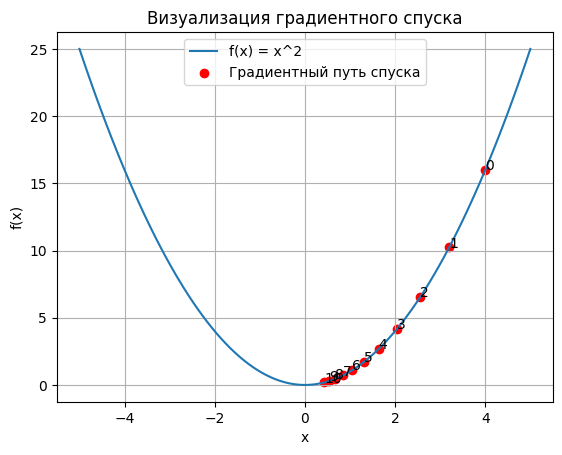

In [38]:
import matplotlib.pyplot as plt

def f(x):
    return x ** 2

def f_derivative(x):
    return 2 * x

# Градиентный спуск
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]
    for i in range(num_iterations):
        x = x - learning_rate * f_derivative(x)
        history.append(x)
    return history

starting_point = 4  # Начальное положение
learning_rate = 0.1  # Скорость обучения
num_iterations = 10  # Количество итераций

history = gradient_descent(starting_point, learning_rate, num_iterations)

# Визуализация
x_vals = np.linspace(-5, 5, 100)
plt.plot(x_vals, f(x_vals), label='f(x) = x^2')
plt.scatter(history, [f(x) for x in history], c='red', label='Градиентный путь спуска')
for i, txt in enumerate(history):
    plt.annotate(i, (history[i], f(history[i])))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Визуализация градиентного спуска')
plt.legend()
plt.grid(True)
plt.show()


### Задача 4. Визуализация градиентного спуска для трехмерной функции (4 балла)
В теории оптимизации есть достаточно известная функция Розенброка. Она используется для проверки производительности алгоритмов.

Постройте трехмерную визуализацию (plt.surface() или ее двумерные аналоги, например, plt.contourf()), работы градиентного спуска для функции Розенброка:

В качестве визуализации текущего расположения градиентного спуска лучше использовать линейный график красного цвета, чтобы отследить блуждания функции в трехмерном пространстве. Визуализацию снабдите названием, подписями к осям, а также добавьте текст с номером итерации (цвет выбирайте в зависимости от читаемости). Положение точки градиентного спуска на итерации n лучше изобразить через Line plot.

Пример работы plt.contourf():

x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.set_title("origin='upper'")
ax2.set_title("origin='lower'")
ax1.contourf(h, levels=np.arange(5, 70, 5), extend='both', origin="upper")
cs2 = ax2.contourf(h, levels=np.arange(5, 70, 5), extend='both', origin="lower")
fig.colorbar(cs2, ax=ax2, shrink=0.9)

plt.show()

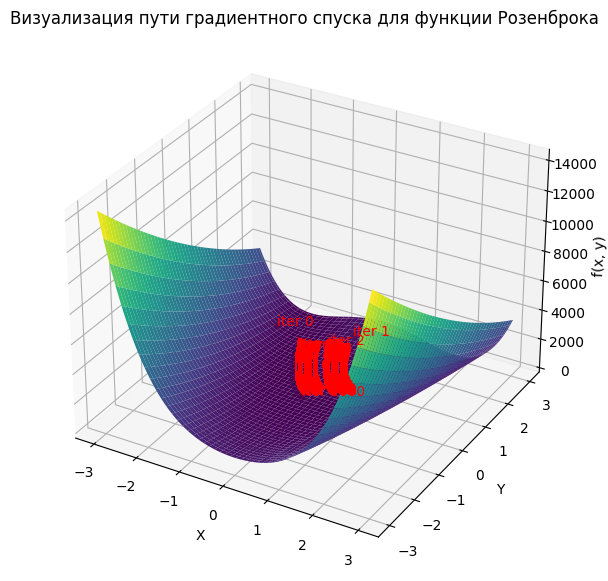

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Функция Розенброка
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

# Производные функции Розенброка по x и y
def rosenbrock_derivative(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x ** 2)
    dy = 200 * (y - x ** 2)
    return dx, dy

# Градиентный спуск
def gradient_descent_2d(starting_point, learning_rate, num_iterations):
    x, y = starting_point
    history = [(x, y)]
    for i in range(num_iterations):
        dx, dy = rosenbrock_derivative(x, y)
        x = x - learning_rate * dx
        y = y - learning_rate * dy
        history.append((x, y))
    return history

starting_point = (-2, 2)  # Начальное положение
learning_rate = 0.001  # Скорость обучения
num_iterations = 1000  # Количество итераций

history = gradient_descent_2d(starting_point, learning_rate, num_iterations)

# Визуализация функции Розенброка
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Визуализация пути градиентного спуска
for i, (x, y) in enumerate(history):
    ax.plot([x], [y], [rosenbrock(x, y)], markerfacecolor='r', marker='o', markersize=5)
    ax.text(x, y, rosenbrock(x, y), f'iter {i}', color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Визуализация пути градиентного спуска для функции Розенброка')
plt.show()
